In [15]:
# Install packages
from pathlib import Path
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
# Read file
data_url = "https://storage.googleapis.com/covid19-open-data/v3/epidemiology.csv"
df_path = Path("Spring2025AI_Week02_IntroToPython_epidemiology.csv")
covid_df = pd.read_csv(df_path)

In [17]:
# Download only if missing
if not df_path.exists():
    print(f"Downloading to {df_path} ...")
    df_path.parent.mkdir(parents=True, exist_ok=True)
    with requests.get(data_url, stream=True, timeout=60) as r:
        r.raise_for_status()
        with open(df_path, "wb") as f:
            for chunk in r.iter_content(chunk_size=1_048_576):  # 1 MB
                if chunk:
                    f.write(chunk)
    print("Download complete.")

In [18]:
# Inspecting the dataframe - Data is messy in the real world. 

covid_df.shape    # Shape of the object (2D)
covid_df.dtypes   # Data types in each column
covid_df.columns  # Column names


covid_df.head()       # Displays first 5 rows
covid_df.tail()       # Displays last 5 rows
covid_df.sample()     # Displays a randow rows
covid_df.info()       # DataFrame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   location_key          object 
 2   new_confirmed         float64
 3   new_deceased          float64
 4   new_recovered         float64
 5   new_tested            float64
 6   cumulative_confirmed  float64
 7   cumulative_deceased   float64
 8   cumulative_recovered  float64
 9   cumulative_tested     float64
dtypes: float64(8), object(2)
memory usage: 955.6+ MB


In [19]:
# Subsetting a dataframe - by rows and columns (also cover multiple conditions - AND, OR)

denmark_covid_df = covid_df[covid_df['location_key']=="DK"]
india_covid_df = covid_df[covid_df['location_key']=="IN"]
covid_df.shape
print("Denmark", denmark_covid_df.shape)
print("India", india_covid_df.shape)

# Denmark + India

#dk_in_covid_df = covid_df[(covid_df['location_key']=="DK") | (covid_df['location_key']=="IN")]
dk_in_covid_df = covid_df[(covid_df['location_key']=="DK") & (covid_df['location_key']=="IN")]
dk_in_covid_df.shape
print("Denmark & India", dk_in_covid_df.shape)


Denmark (987, 10)
India (987, 10)
Denmark & India (0, 10)


In [20]:
# Assignment

# Section A
# 1. What is the number of unique values in the column "location_key"?
covid_df['location_key'].nunique()

# 2. What's the earliest date for which the data has been collected for? And the latest date? 
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df['date'].min()
covid_df['date'].max()

# 3. On how many dates did we see the reported deaths greater than 100? 
deaths_over_100 = covid_df[covid_df['new_deceased']>100] # First we take a subset of the master dataframe where new_deceased > 100 
deaths_over_100.shape # If you check this dataframe, there are more than 20000 rows but they are not unique dates. 
unique_dates_count = deaths_over_100['date'].nunique()
print("Number of unique dates where new_deceased > 100:", unique_dates_count)


# Section B
# Create a subset of the data satifying the following conditions 
# 1. All the data for the year 2021 only. 
covid_df['year'] = covid_df['date'].dt.year # This statement creates a new column in the dataframe called "year" 
print(covid_df['year'].dtype) # You can see that the data type of this column "year" is "int32", meaning it's an integer 
covid_2021_df = covid_df[covid_df['year']==2021]  # Since the year column is of type integer, we can treat the value as a number. For example, if it were a string, we would've had to specify the value as "2021" 


# 2. Denmark, but only the data from 2020. 
covid_dk_2020_df = covid_df[(covid_df['location_key']=="DK") & covid_df['year']==2020] # Here you can see how differently we filter columns that are strings and integers 

# 3. India, but also all the dates where the new cases reported were more than 1000. 
covid_in_df = covid_df[(covid_df['location_key']=="IN") & covid_df['new_confirmed']>1000]

# Section C
# 1. Subset the data to only include the following columns: "date","location_key","new_confirmed", "new_deceased", "new_recovered", "new_tested"
covid_leaner_df = covid_df[["date","location_key","new_confirmed", "new_deceased", "new_recovered", "new_tested"]]
covid_leaner_df.head()


Number of unique dates where new_deceased > 100: 937
int32


,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN


In [21]:
# Creating a new column that is calculated from two other columns
# Let's create a new column called "mortality rate", which is basically the ratio of the number of deaths to the number of confirmed cases. "Of the number of people confirmed as covid positive, how many died?"
# To make this easier to understand, let's filter out the rows only where new_confirmed and new_deceased are BOTH > 0 (To avoid dividing zero by zero, or dividing a positive number by zero, which results in infinity)


covid_mortality_rate_df = covid_df[(covid_df['new_confirmed']>0) & (covid_df['new_deceased']>0)]
covid_mortality_rate_df['mortality_rate'] = covid_mortality_rate_df['new_deceased'] / covid_mortality_rate_df['new_confirmed'] 

#Let's look at the average mortality rate by each year
# For this we need to group by the year, and calculate the average mortality rate for each year 

mortality_rate_by_year = covid_mortality_rate_df.groupby(["year"])['mortality_rate'].mean()


# What do you observe about the mortality rate? 



C:\Users\Juliana\AppData\Local\Temp\ipykernel_3832\4032156458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mortality_rate_df['mortality_rate'] = covid_mortality_rate_df['new_deceased'] / covid_mortality_rate_df['new_confirmed']


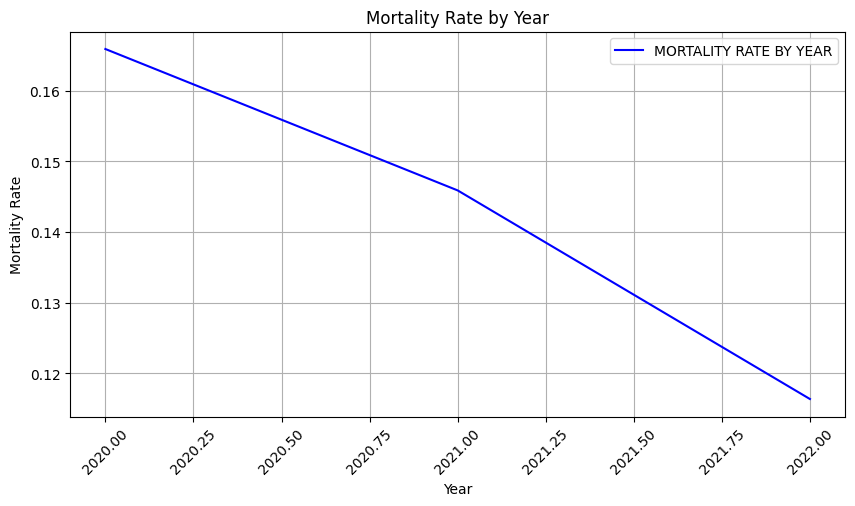

In [22]:
# Let's plot the mortality rate by year to visualise the trend

# Before we do this, we must do the following as the groupby function does not output a dataframe when you apply an aggregation (.mean(), .sum(), .count(), etc.) to a single column, Pandas returns a Series, where:
# The index is the groupby key (year).
# The values are the computed mean mortality rate.

mortality_rate_df = mortality_rate_by_year.reset_index()
# Rename columns for clarity (optional)
mortality_rate_df.columns = ['year', 'average_mortality_rate']

plt.figure(figsize=(10,5))
plt.plot(mortality_rate_df["year"], mortality_rate_df["average_mortality_rate"], label="MORTALITY RATE BY YEAR", color="blue")

# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate by Year")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


In [23]:
# BONUS 
# The index in Pandas is used to label rows in DataFrames and Series.
# You can access rows using .loc[] with index labels.

# When to use index and what is the purpose, especially in the context of subsetting? 
# Using .loc[] is the best practice whenever you need to MODIFY specific rows/columns in a Pandas dataframe.

# Let's use the mortality_rate_df dataframe to explain the difference between using indexes and not using them 

mortality_rate_df

# Try this first and check the output 
mortality_rate_df.loc[mortality_rate_df['year'] > 2021, 'average_mortality_rate'] = 0.11
mortality_rate_df # The dataframe is unchanged - this creates a copy of the filtered dataframe, so modifying it does not change the original df

# Try this instead - here we use index to subset 
mortality_rate_df.loc[mortality_rate_df['year'] > 2021, 'average_mortality_rate'] = 0.11
mortality_rate_df 



,year,average_mortality_rate
0,2020,0.165881
1,2021,0.145871
2,2022,0.110000
